In [1]:
import mltable
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
ml_client = MLClient.from_config(credential=DefaultAzureCredential())
data_asset = ml_client.data.get("kidney-stone", version="1")

table = mltable.load(f'azureml:/{data_asset.id}')

data = table.to_pandas_dataframe()
data.head(10)

Found the config file in: /config.json


,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
5,1.020,5.27,668,25.3,252,3.34,0
6,1.012,5.62,461,17.4,195,1.40,0
7,1.029,5.67,1107,35.9,550,8.48,0
8,1.015,5.41,543,21.9,170,1.16,0
9,1.021,6.13,779,25.7,382,2.21,0


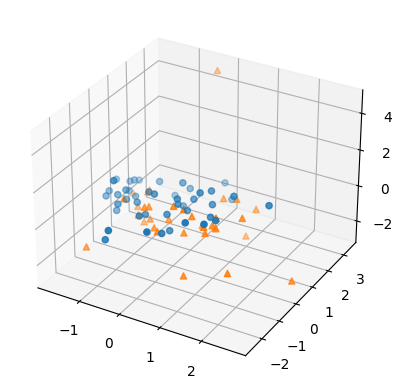

In [3]:
features = data.drop(['target'], axis=1)
target = data['target']

# reduce number of dimension, to visualize in 3D scatter plot, and for better working with distance base algorithms
pca = PCA(n_components=3)
features = pca.fit_transform(features)

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

labels, labels_sign = (0, 1), ('o', '^')
for label, sign in zip(labels, labels_sign):
    label_features = features[target == label]
    ax.scatter(label_features[:, 0], label_features[:, 1], label_features[:, 2], marker=sign)

In [ ]:
""" Problem is certainly not linear separable, points with same labels are close to others, but many are indent in other label points,
there are also some outliers. I will try KNN and SVC with some kernel tricks. Also tree based models can be good solution."""